In [1]:
import tensorflow as tf
import numpy as np

# Классификация отзывов к фильмам: пример бинарной классификации

### 3.4.1. The IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #сохраняем только 10000 самых популярных слов

17465344/17464789 [==============================] - 23s 1us/step


Переменные train_data и test_data — это списки отзывов; каждый отзыв — это список индексов слов (кодированное представление последовательности слов). Переменные train_labels и test_labels — это списки нулей и единиц, где нули соответствуют отрицательным отзывам, а единицы — положительным

In [5]:
print(train_data[0][:10])
print(train_labels[0])
print(max([max(sequence) for sequence in train_data])) #наибольший индекс слова

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1
9999


In [6]:
#пример декодирования отзыва в слова
word_index = imdb.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 3s 2us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 3.4.2. Подготовка данных

In [7]:
# Листинг 3.2. Кодирование последовательностей целых чисел в бинарную матрицу
import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. #Запись единицы в элемент с данным индексом 
    return results
x_train = vectorize_sequences(train_data) # Векторизованные обучающие данные
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### 3.4.3. Конструирование сети

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #16 нейронов слоя
model.add(layers.Dense(16, activation='relu')) #16 нейронов слоя
model.add(layers.Dense(1, activation='sigmoid')) #1 нейрон слоя, функция sigmoid (выдает вероятность класса)

Функция relu (rectified linear unit — блок линейной ректификации) используется для преобразования отрицательных значений в ноль, а сигмоидная функция рассредоточивает произвольные значения по интервалу [0, 1], возвращая значения, которые можно интерпретировать как вероятность.

In [14]:
#настраиваем оптимизатор, функцию потерь и метрику
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Листинг 3.5. Настройка оптимизатора

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Листинг 3.6. Использование нестандартных функций потерь и метрик

from tensorflow.keras import losses

from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### 3.4.4. Cоздание тестового набора данных

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Теперь проведем обучение модели в течение 20 эпох (выполнив 20 итераций по всем образцам в тензорах x_train и y_train) пакетами по 512 образцов. В то же время будем следить за потерями и точностью на 10 000 отложенных образцов. Для этого достаточно передать проверочные данные в аргументе validation_data.

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 172s 11ms/sample - loss: 0.5136 - accuracy: 0.8057 - val_loss: 0.3976 - val_accuracy: 0.8649
Epoch 2/20
15000/15000 [==============================] - 10s 648us/sample - loss: 0.3147 - accuracy: 0.9003 - val_loss: 0.3175 - val_accuracy: 0.8762
Epoch 3/20
15000/15000 [==============================] - 2s 166us/sample - loss: 0.2321 - accuracy: 0.9246 - val_loss: 0.3035 - val_accuracy: 0.8757
Epoch 4/20
15000/15000 [==============================] - 3s 179us/sample - loss: 0.1829 - accuracy: 0.9402 - val_loss: 0.2862 - val_accuracy: 0.8847
Epoch 5/20
15000/15000 [==============================] - 2s 160us/sample - loss: 0.1506 - accuracy: 0.9523 - val_loss: 0.2767 - val_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 164us/sample - loss: 0.1251 - accuracy: 0.9600 - val_loss: 0.2911 - val_accuracy: 0.8843
Epoch 7/20
15000/15000 [========================

Обратите внимание на то, что вызов model.fit() возвращает объект History. Этот объект имеет поле history — словарь с данными обо всем происходившем в процессе обучения.

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

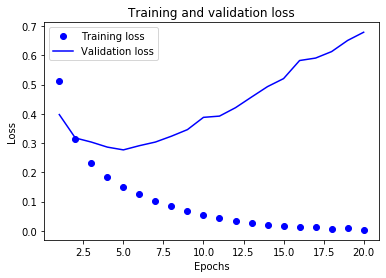

In [21]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

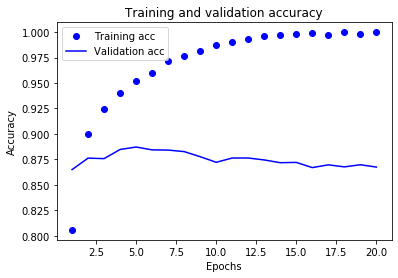

In [23]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Видим, что в данном случае наблюдается переобучение: после пятой эпохи произошла чрезмерная оптимизация на обучающих данных, и в результате получилось представление, характерное для обучающих данных, не обобщающее данные за пределами обучающего набора.
В данном случае для предотвращения переобучения можно прекратить обучение после пятой эпохи.

Обучим новую модель, предотвратив переобучение и применив результат к тестовым данным

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.5297 - accuracy: 0.7639
Epoch 2/4
25000/25000 [==============================] - 3s 100us/sample - loss: 0.3125 - accuracy: 0.9042
Epoch 3/4
25000/25000 [==============================] - 3s 102us/sample - loss: 0.2274 - accuracy: 0.9252
Epoch 4/4
25000/25000 [==============================] - 234s 9ms/sample - loss: 0.2925 - accuracy: 0.8842


In [25]:
results #точность на тестовом наборе данных составила 88%

[0.2925445203304291, 0.8842]

In [ ]:
model.predict(x_test) # Предсказания модели

### Выводы из этого примера:

1) Обычно исходные данные приходится подвергать некоторой предварительной обработке, чтобы передать их в нейронную сеть в виде тензоров. Последовательности слов можно преобразовать в бинарные векторы, но существуют также другие варианты.

2) Стек слоев Dense с функцией активации relu способен решать широкий круг задач (включая классификацию эмоциональной окраски), и вы, вероятно, чаще всего будете использовать именно эту комбинацию.

3) В задаче бинарной классификации (с двумя выходными классами) в конце вашей нейросети должен находиться слой Dense с одним нейроном и функцией активации sigmoid: результатом работы сети должно быть скалярное значение в диапазоне между 0 и 1, представляющее собой вероятность.

4) С таким скалярным результатом, получаемым с помощью сигмоидной функции, в задачах бинарной классификации следует использовать функцию потерь binary_crossentropy.

5) В общем случае оптимизатор rmsprop является наиболее подходящим выбором для любого типа задач. Одной головной болью меньше для вас.

6) По мере улучшения на обучающих данных нейронные сети рано или поздно начинают переобучаться, демонстрируя ухудшение результатов на данных, которые они прежде не видели. Поэтому всегда контролируйте качество работы сети на данных не из обучающего набора.